In [38]:
pip install category_encoders

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
accident = pd.read_csv("US_Accidents_March23.csv",low_memory=False)

In [41]:
accident.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [42]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

Many null values in this data but we do not include these columns for EDA and model

In [43]:
accident.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [44]:
accident.duplicated().sum()

0

Include ID, Severity, Start Time, End Time, Distiance. County,  State, City, Weather_Condition     foe EDA

In [45]:
accident_analysis =  accident[["Severity","Start_Time", "End_Time","State","City", "Weather_Condition","Description"]]

In [46]:
accident["Severity"].value_counts().sort_values(ascending=False).head(3)

Severity
2    6156981
3    1299337
4     204710
Name: count, dtype: int64

In [47]:
accident["State"].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

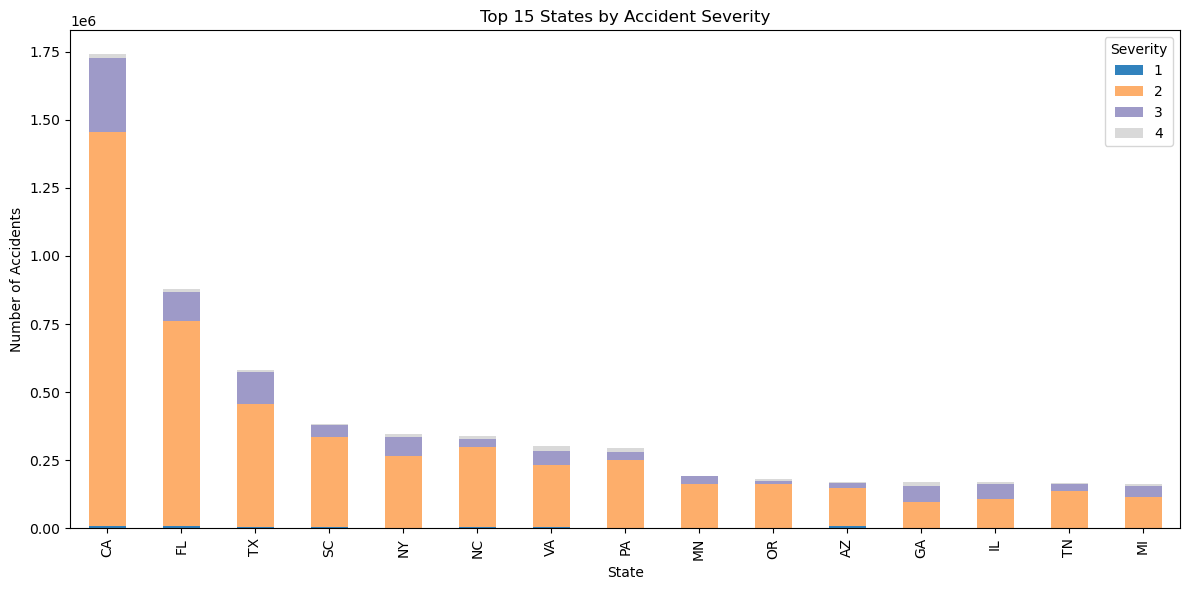

In [48]:
#Get accident distribution  by states and severity
state_dist =  accident.groupby("State")["Severity"].value_counts().sort_values(ascending=False).reset_index()

#Pivot table for stacked bar chart
pivot_state = state_dist.pivot(index="State", columns="Severity", values="count").fillna(0)

# Get top 15 states with most total accidents
top_states =pivot_state.sum(axis=1).nlargest(15).index

# Filter the pivoted DataFrame to only these states
top15_state = pivot_state.loc[top_states]


# Sort again for cleaner bar chart
top15_state = top15_state.loc[top15_state.sum(axis=1).sort_values(ascending=False).index]

# Plot
top15_state.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20c')

plt.title("Top 15 States by Accident Severity")
plt.ylabel("Number of Accidents")
plt.xlabel("State")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()

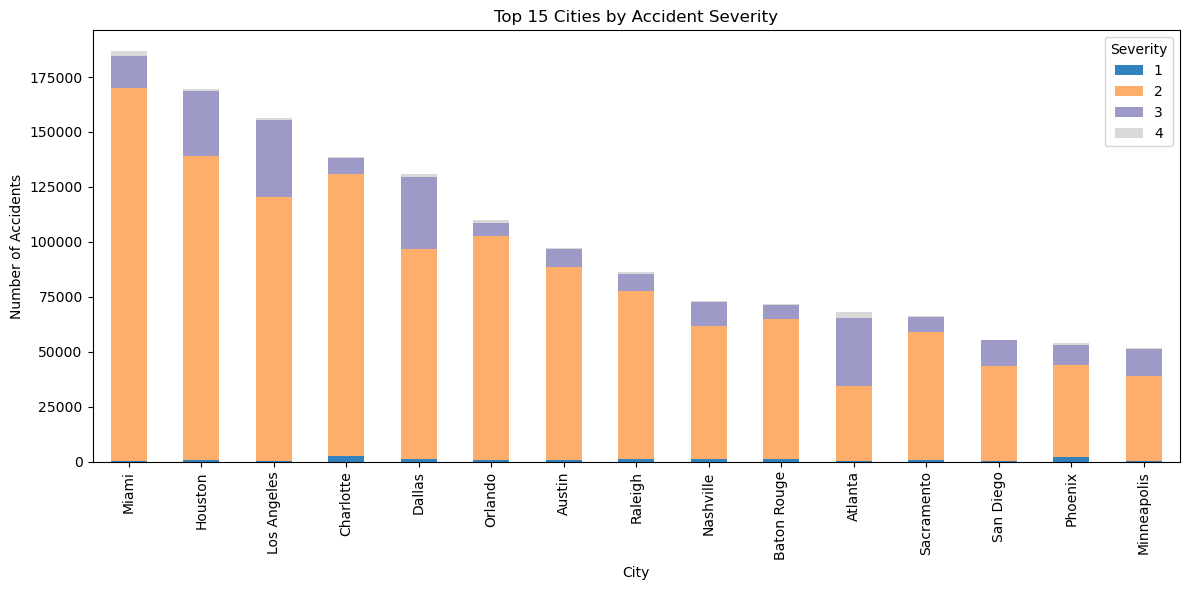

In [49]:
#Get accident distribution  by cities and severity
city_dist =  accident.groupby("City")["Severity"].value_counts().sort_values(ascending=False).reset_index()

#Pivot table for stacked bar chart
pivot_city = city_dist.pivot(index="City", columns="Severity", values="count").fillna(0)

# Get top 15 states with most total accidents
top_city =pivot_city.sum(axis=1).nlargest(15).index

# Filter the pivoted DataFrame to only these states
top15_city = pivot_city.loc[top_city]


# Sort again for cleaner bar chart
top15_city = top15_city.loc[top15_city.sum(axis=1).sort_values(ascending=False).index]

# Plot
top15_city.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20c')

plt.title("Top 15 Cities by Accident Severity")
plt.ylabel("Number of Accidents")
plt.xlabel("City")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()

California leads with approximately 1.75 million reported accidents, making it the most affected state, followed by Florida and Texas, each with around 1 million incidents. Across all states, Severity 2 accidents are the most prevalent, with Severity 3 trailing closely behind. Interestingly, Severity 1 accidents are extremely rare in every state, which underscores the overall high severity of reported accidents.

Miami stands out as the most affected city, despite Florida ranking second in overall accident numbers by state. Atlanta is particularly noteworthy for having a nearly equal distribution between Severity 2 and Severity 3 accidents.

In [50]:
accident["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

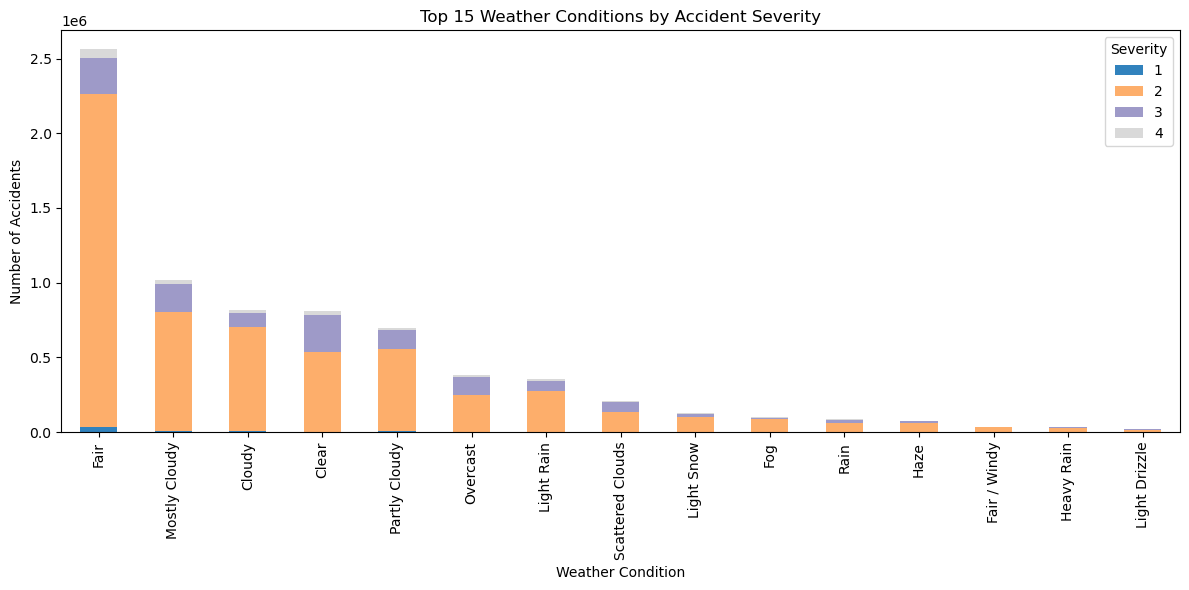

In [51]:
#Get accident distribution  by states and severity
weather_dist =  accident.groupby("Weather_Condition")["Severity"].value_counts().sort_values(ascending=False).reset_index()

#Pivot table for stacked bar chart
pivot_weather = weather_dist.pivot(index="Weather_Condition", columns="Severity", values="count").fillna(0)

# Get top 15 states with most total accidents
top_weather =pivot_weather.sum(axis=1).nlargest(15).index

# Filter the pivoted DataFrame to only these states
top15_weather = pivot_weather.loc[top_weather]


# Sort again for cleaner bar chart
top15_weather = top15_weather.loc[top15_weather.sum(axis=1).sort_values(ascending=False).index]

# Plot
top15_weather.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20c')

plt.title("Top 15 Weather Conditions by Accident Severity")
plt.ylabel("Number of Accidents")
plt.xlabel("Weather Condition")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()

Put some note here

In [52]:
#Convert start and end time column to datetime type
accident_analysis ['Start_Time'] =  pd.to_datetime(accident_analysis['Start_Time'],format ="mixed")
accident_analysis ['End_Time'] =  pd.to_datetime(accident_analysis['Start_Time'],format ="mixed")

#Create new columns for EDA
accident_analysis ['month_name'] = accident_analysis['Start_Time'].dt.month_name() 
accident_analysis ['day_name'] = accident_analysis['Start_Time'].dt.day_name()
accident_analysis ['hour_bin'] =  pd.cut(np.array(pd.to_datetime(accident['Start_Time'],format ="mixed").dt.hour),
       12, labels=["0-2", "2-4", "4-6","6-8", "8-10", "10-12","12-14", "14-16", "16-18","18-20", "20-22", "22-24"])


C:\Users\bduong\AppData\Local\Temp\ipykernel_11940\91361000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_analysis ['Start_Time'] =  pd.to_datetime(accident_analysis['Start_Time'],format ="mixed")
C:\Users\bduong\AppData\Local\Temp\ipykernel_11940\91361000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_analysis ['End_Time'] =  pd.to_datetime(accident_analysis['Start_Time'],format ="mixed")
C:\Users\bduong\AppData\Local\Temp\ipykernel_11940\91361000.py:6: SettingWithCopyWarning: 

C:\Users\bduong\AppData\Local\Temp\ipykernel_11940\1645583824.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_dist =  accident_analysis.groupby("hour_bin")["Severity"].value_counts().sort_values(ascending=False).reset_index()


<Figure size 1200x800 with 0 Axes>

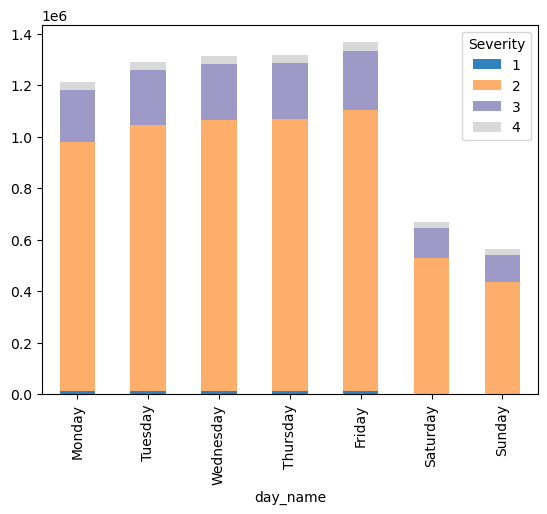

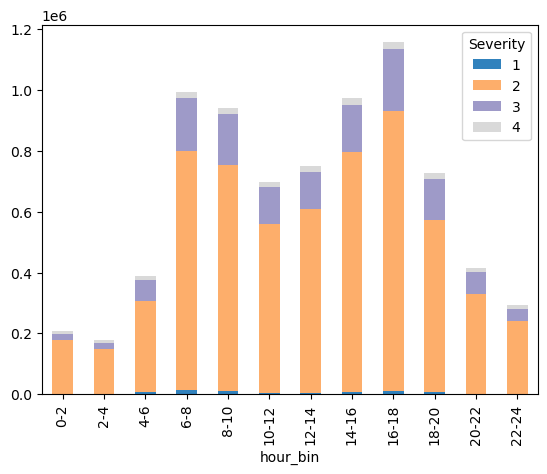

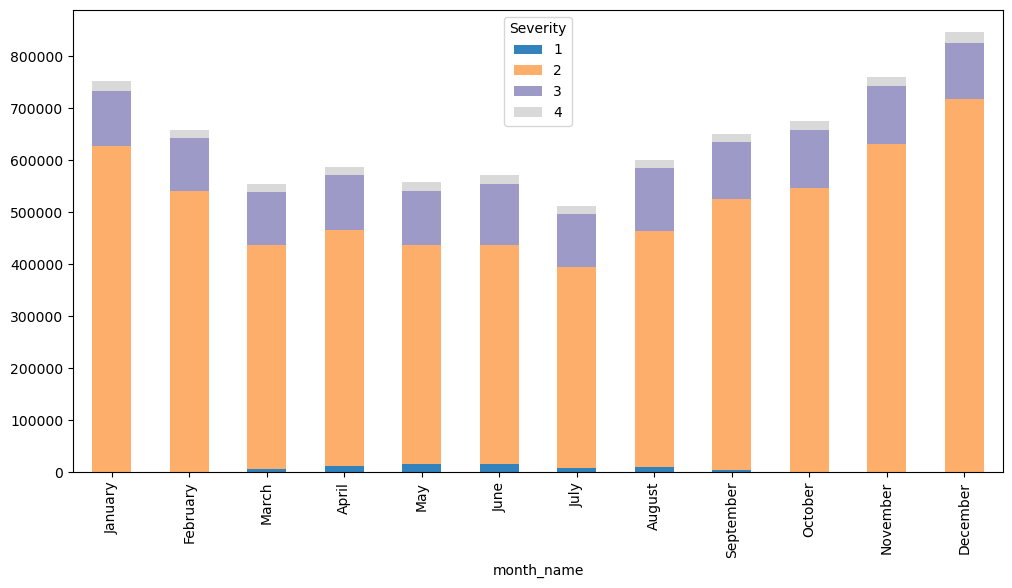

In [53]:
mon_dist =  accident_analysis.groupby("month_name")["Severity"].value_counts().sort_values(ascending=False).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
mon_dist['month_name'] = pd.Categorical(mon_dist['month_name'], categories=month_order, ordered=True)
mon_dist = mon_dist.sort_values(by='month_name').reset_index(drop=True)
pivot_mon = mon_dist.pivot(index="month_name", columns="Severity", values="count").fillna(0)


day_dist =  accident_analysis.groupby("day_name")["Severity"].value_counts().sort_values(ascending=False).reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day_dist['day_name'] = pd.Categorical(day_dist['day_name'], categories=day_order, ordered=True)
day_dist = day_dist.sort_values(by='day_name').reset_index(drop=True)
pivot_day = day_dist.pivot(index="day_name", columns="Severity", values="count").fillna(0)

hour_dist =  accident_analysis.groupby("hour_bin")["Severity"].value_counts().sort_values(ascending=False).reset_index()
pivot_hour = hour_dist.pivot(index="hour_bin", columns="Severity", values="count").fillna(0)



plt.figure(figsize=(12,8))

pivot_day.plot(kind='bar', stacked=True, colormap='tab20c')

pivot_hour.plot(kind='bar', stacked=True, colormap='tab20c')

pivot_mon.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20c')





plt.show()

##  Basic Cleaning & Train‑Test Split

In [54]:

# Only get 100k rows for training model due to hardware limitation
accident_sample = accident.head(100000)

In [55]:
accident_sample = accident_sample.drop(["ID", "Source","End_Time","Country"], axis=1) #These columns are not fit with model purpose

In [56]:
#Transform datime value to separate columns

def extract_time_features(df, datetime_col, drop_original=False, prefix=None):
 
    col = df[datetime_col]
    if not np.issubdtype(col.dtype, np.datetime64):
        df[datetime_col] = pd.to_datetime(col,format ="mixed")

    pre = f"{prefix}_" if prefix else f"{datetime_col}_"

    df[pre + 'month'] = df[datetime_col].dt.month
    df[pre + 'day'] = df[datetime_col].dt.day
    df[pre + 'weekday'] = df[datetime_col].dt.weekday
    df[pre + 'hour'] = df[datetime_col].dt.hour


    if drop_original:
        df.drop(columns=[datetime_col], inplace=True)

    return df


In [57]:
extract_time_features(accident_sample, 'Start_Time', drop_original=False)

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_month,Start_Time_day,Start_Time_weekday,Start_Time_hour
0,3,2016-02-08 05:46:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,...,False,False,Night,Night,Night,Night,2,8,0,5
1,2,2016-02-08 06:07:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,...,False,False,Night,Night,Night,Day,2,8,0,6
2,2,2016-02-08 06:49:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,...,True,False,Night,Night,Day,Day,2,8,0,6
3,3,2016-02-08 07:23:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,...,False,False,Night,Day,Day,Day,2,8,0,7
4,2,2016-02-08 07:39:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,...,True,False,Day,Day,Day,Day,2,8,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,2016-04-05 15:52:14,32.731979,-117.111244,NaN,NaN,0.00,Right hand shoulder blocked due to accident on...,CA-15 N,San Diego,...,False,False,Day,Day,Day,Day,4,5,1,15
99996,3,2016-04-05 15:57:10,33.913029,-118.125389,NaN,NaN,0.00,Two lanes blocked and queueing traffic due to ...,Bellflower Blvd,Downey,...,False,False,Day,Day,Day,Day,4,5,1,15
99997,2,2016-04-05 16:02:16,34.121517,-117.536896,NaN,NaN,0.00,Accident on Day Creek Blvd near Baseline Rd.,Baseline Rd,Rancho Cucamonga,...,True,False,Day,Day,Day,Day,4,5,1,16
99998,2,2016-04-05 16:01:17,33.995079,-117.361183,NaN,NaN,0.00,Lane blocked on exit ramp due to accident moto...,Pomona Fwy W,Riverside,...,False,False,Day,Day,Day,Day,4,5,1,16


In [58]:
#Encode categorical values.

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from category_encoders  import TargetEncoder 


def kfold_target_encode(df, target_col, categorical_cols, n_splits=5, random_state=42):
    df_encoded = df.copy()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for col in categorical_cols:
        encoded_col = np.zeros(len(df), dtype=float)

        for train_idx, val_idx in kf.split(df):
            X_train = df.iloc[train_idx][[col]]
            y_train = df.iloc[train_idx][target_col]
            X_val = df.iloc[val_idx][[col]]

            encoder = TargetEncoder()
            encoder.fit(X_train, y_train)
            transformed = encoder.transform(X_val)

            # Assign values directly using correct indexing
            encoded_col[val_idx] = transformed[col].values

        # Replace original column with encoded version
        df_encoded[col] = encoded_col

    return df_encoded


categorical_cols = accident_sample.select_dtypes(include=["object", "category"]).columns.tolist()
accident_encoded = kfold_target_encode(accident_sample, target_col="Severity", categorical_cols=categorical_cols, n_splits=5)



In [59]:
#Replace Nan value
accident_encoded = accident_encoded.fillna(0)

In [60]:
#Split training and target data for model.
X =  accident_encoded.loc[:, ~accident_encoded.columns.isin(['Severity','Start_Time','End_Time'])]
y = accident_encoded['Severity'].loc[X.index]


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

num_features = X.columns.tolist()
preprocess = ColumnTransformer([
    ("scale", StandardScaler(), num_features)
])



In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

def regression_metrics(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} | MAE: {mae:.3f}  RMSE: {rmse:.3f}  R2: {r2:.3f}")

regression_metrics(y_test, y_pred_base, "Baseline")

Baseline | MAE: 0.452  RMSE: 0.453  R2: -0.807


## 5  Feature Importance with SHAP

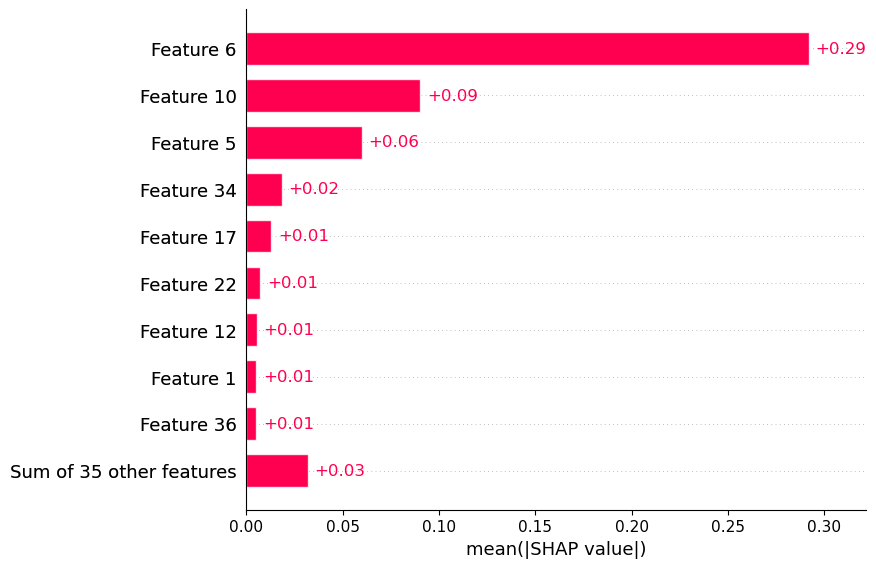

In [63]:
from sklearn.ensemble import RandomForestRegressor
import shap

rf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1))
])

X_sample = X_train.sample(100, random_state=42)
y_sample = y_train.loc[X_sample.index]
rf.fit(X_sample, y_sample)

# SHAP values
explainer = shap.Explainer(rf.named_steps["model"])
# Need transformed data for explainer
X_train_scaled = preprocess.fit_transform(X_sample)
shap_values = explainer(X_train_scaled, check_additivity=False)

shap.plots.bar(shap_values, max_display=10)

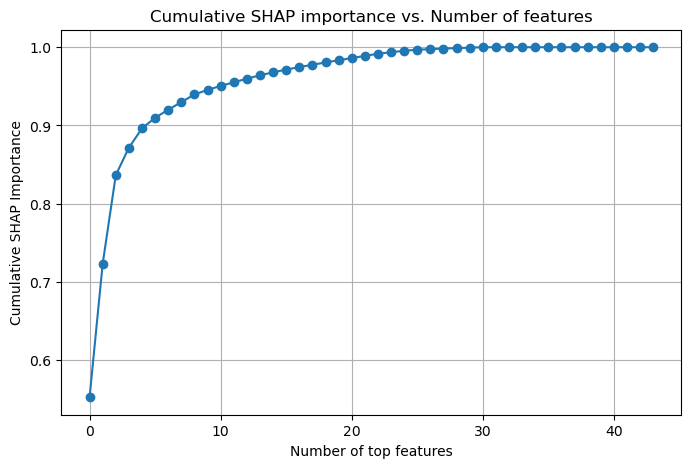

In [64]:
abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.Series(abs_shap, index=num_features).sort_values(ascending=False)
cumulative_importance = feature_importance.cumsum() / feature_importance.sum()

plt.figure(figsize=(8, 5))
plt.plot(cumulative_importance.values, marker='o')
plt.xlabel("Number of top features")
plt.ylabel("Cumulative SHAP Importance")
plt.title("Cumulative SHAP importance vs. Number of features")
plt.grid()
plt.show()

In [65]:
#pick top 30 features for model
top_features = feature_importance.head(30).index.tolist()
print("Top features:", top_features)

Top features: ['Street', 'Zipcode', 'Description', 'Traffic_Signal', 'Pressure(in)', 'Weather_Condition', 'Airport_Code', 'Start_Lng', 'Sunrise_Sunset', 'County', 'Crossing', 'Wind_Direction', 'Weather_Timestamp', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Start_Time_day', 'City', 'Wind_Speed(mph)', 'Start_Time_hour', 'Civil_Twilight', 'Amenity', 'Start_Time_weekday', 'Start_Time_month', 'Station', 'Visibility(mi)', 'Start_Lat', 'State', 'Astronomical_Twilight', 'Nautical_Twilight']


## Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier


clf = Pipeline(steps=[
     ("prep", ColumnTransformer([("scale", StandardScaler(), top_features)])),
     ('classifier',  GradientBoostingClassifier(random_state=42))
])


clf.fit(X_train[top_features], y_train)

# 5. Make predictions on the test set
y_pred = clf.predict(X_test[top_features])

regression_metrics(y_test, y_pred, "GradientBoosting")


GradientBoosting | MAE: 0.056  RMSE: 0.057  R2: 0.772


## Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf_2 = Pipeline(steps=[
     ("prep", ColumnTransformer([("scale", StandardScaler(), top_features)])),
     ('classifier',  RandomForestClassifier(n_estimators=100,  max_depth=3, random_state=42))
])



# 4. Fit the model to the training data
clf_2.fit(X_train[top_features], y_train)

# 5. Make predictions on the test set
y_pred = clf_2.predict(X_test[top_features])

regression_metrics(y_test, y_pred, "RandomForest")


RandomForest | MAE: 0.061  RMSE: 0.061  R2: 0.758


GBR has a better performance so will be used for Hyper‑parameter Tuning 

## Hyper‑parameter Tuning – Gradient Boosting

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


param_dist = {
    "classifier__n_estimators": randint(100, 800),
    "classifier__max_depth": randint(2, 6),
    "classifier__learning_rate": uniform(0.01, 0.2),
    "classifier__subsample": uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search.fit(X_train[top_features], y_train)

print("Best params:", random_search.best_params_)
best_gbr = random_search.best_estimator_
y_pred_best = best_gbr.predict(X_test)
regression_metrics(y_test, y_pred_best, "Tuned GBR")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'classifier__learning_rate': 0.03789877213040837, 'classifier__max_depth': 5, 'classifier__n_estimators': 799, 'classifier__subsample': 0.8099085529881075}
Tuned GBR | MAE: 0.048  RMSE: 0.049  R2: 0.805


## Cross‑Validation Report

In [69]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    best_gbr, X_train, y_train,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
print("CV MAE scores:", -cv_scores)
print(f"Mean CV MAE: {-cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

CV MAE scores: [0.0528125 0.048     0.0435625 0.0491875 0.04675  ]
Mean CV MAE: 0.048 ± 0.003


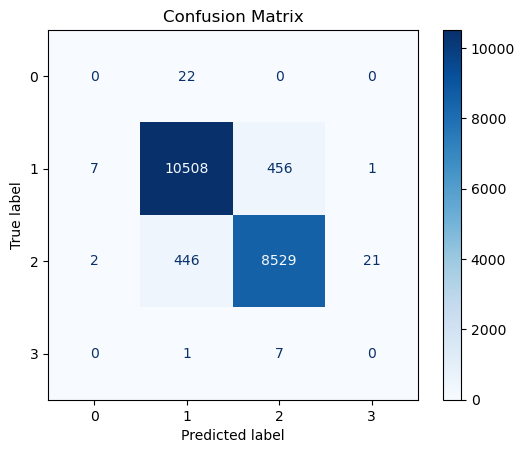

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred_best)
cmdisp=ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()